In [2]:
#pip install pandas,numpy,scikit-learn,matplotlib,nltk,seaborn
!pip install nltk
!pip install scikit-learn

In [4]:
#install important liabraries
import numpy as np ## scientific computation
import pandas as pd ## loading dataset file
import matplotlib.pyplot as plt ## Visulization
import nltk  ## Preprocessing our text
from nltk.corpus import stopwords ## removing all the stop words
from nltk.stem.porter import PorterStemmer ## stemming of words

In [5]:
df = pd.read_csv("spam_ham_dataset.csv")

In [6]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [7]:
print(df.shape)  ### Return the shape of data 

(5171, 4)


In [6]:
print(df.ndim)   ### Return the n dimensions of data

2


In [7]:
print(df.size)   ### Return the size of data 

20684


In [8]:
print(df.isna().sum())  ### Returns the sum fo all na values

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64


In [9]:
## print(df.info())  ### Give concise summary of a DataFrame

In [8]:
#print(df.head())  ## top 5 rows of the dataframe
print(df.tail()) ## bottom 5 rows of the dataframe

      Unnamed: 0 label                                               text  \
5166        1518   ham  Subject: put the 10 on the ft\r\nthe transport...   
5167         404   ham  Subject: 3 / 4 / 2000 and following noms\r\nhp...   
5168        2933   ham  Subject: calpine daily gas nomination\r\n>\r\n...   
5169        1409   ham  Subject: industrial worksheets for august 2000...   
5170        4807  spam  Subject: important online banking alert\r\ndea...   

      label_num  
5166          0  
5167          0  
5168          0  
5169          0  
5170          1  


## Let’s Visualize the Column label_num

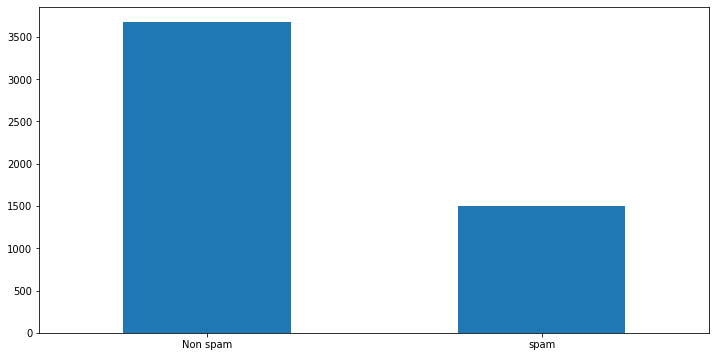

In [9]:
df["label_num"].value_counts().plot(kind="bar",figsize=(12,6))
plt.xticks(np.arange(2), ('Non spam', 'spam'),rotation=0);

## Cleaning The Text

In [10]:
import re
corpus = []
length = len(df)
for i in range(0,length):
    text = re.sub("[^a-zA-Z0-9]"," ",df["text"][i])
    text = text.lower()
    text = text.split()
    pe = PorterStemmer()
    stopword = stopwords.words("english")
    text = [pe.stem(word) for word in text if not word in set(stopword)]
    text = " ".join(text)
    corpus.append(text)
print(corpus)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Explanation:
Line 1: we are importing re library, which is used to perform regex in python.
Line 2: Define an empty corpus list, that can be used to store all the text after cleaning.
Line 3: initializing the var length with the length of the data frame.
Line 4: running a loop from 0 to the length of our data frame.
Line 5: Removing all characters except the lower alphabet, bigger alphabets, and digits.
Line 6: Converting the text to lower.
Line7: Splitting the text by spaces.
Line 8: creating an object of porter stemmer.
Line9: Initializing all the stopword in English dictionary to var stopword
Line 10: Running a loop in the length of the sentence and then for each word in the sentence checking it in stopword and if it does not find in stopword then apply Stemming on to the text and add it to the list.
Line 11: Just concatenating all the words to make a sentence
Line 12: appending the sentence to the corpus list
Line 13: Printing the corpus list.

In [11]:
y = df['label_num']

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=35000)
X = cv.fit_transform(corpus).toarray()

In [13]:
#Dumping the CV for future use
import pickle ## importing pickle used for dumping models
pickle.dump(cv, open('cv.pkl', 'wb')) ## saving to into cv.pkl file

### Modeling and Training
Splitting data into train and validation sets using train_test_split

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
##train size 80% and test size 20%

#### Creating a model using MultinomialNaiveBayes

In [15]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

#### Fitting the model to the training sets

In [16]:
model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

#### Prediction

In [17]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

#### Evaluating Model

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test,y_pred)
print(cm,score*100)

[[716  16]
 [ 17 286]] 96.81159420289856


### Saving our model

In [22]:
import pickle
pickle.dump(model, open("spam.pkl", "wb"))

In [23]:
#Now let’s test our save model by loading it and testing on test data.
loaded_model = pickle.load(open("spam.pkl", "rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)

0.9681159420289855

# Prediction for a new email

In [24]:
def new_review(new_review):
  new_review = new_review
  new_review = re.sub('[^a-zA-Z]', ' ', new_review)
  new_review = new_review.lower()
  new_review = new_review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  new_review = [ps.stem(word) for word in new_review if not word in   set(all_stopwords)]
  new_review = ' '.join(new_review)
  new_corpus = [new_review]
  new_X_test = cv.transform(new_corpus).toarray()
  new_y_pred = loaded_model.predict(new_X_test)
  return new_y_pred
new_review = new_review(str(input("Enter new review...")))
if new_review[0]==1:
  print("SPAM")
else :
  print("NOT SPAM")

Enter new review...you won lottery
SPAM


#for test:hi scott, i was wondering you have submitted your project or not 

#IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI
on a credit card or loan. Please reply PPI for info or STOP to opt out. 